In [90]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from scipy.spatial.distance import cdist

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

data = np.genfromtxt('/Users/yjeonlee/Desktop/[DS-GA-1001]Intro to Data Science/Project3/movieReplicationSet.csv',  delimiter = ',',  skip_header = 1)
print(data.shape)

(1097, 477)


In [91]:
selected = data[:, 421:475]
print(selected.shape)

(1097, 54)


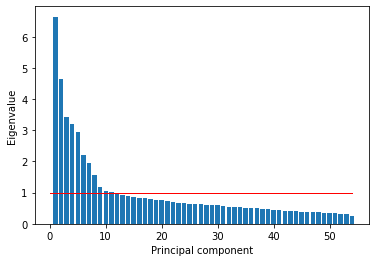

In [92]:
# 1-a.
colMedian = np.nanmedian(selected, axis=0)
indices = np.where(np.isnan(selected))
selected[indices] = np.take(colMedian, indices[1])
#filledData = np.where(np.isnan(selected), ma.array(selected, mask=np.isnan(selected)).median(axis=0), selected)
filledData = selected

zscoredData = stats.zscore(filledData)

pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_
rotatedData = pca.fit_transform(zscoredData)
covarExplained = eigVals/sum(eigVals)*100

numClasses = 54
plt.bar(np.linspace(1,54,54),eigVals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.plot([0,numClasses],[1,1],color='red',linewidth=1) # Kaiser criterion line

Text(0, 0.5, 'Loading')

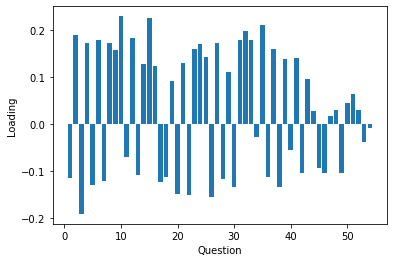

In [93]:
# 1-b.
whichPrincipalComponent = 0 # Try a few possibilities (at least 1,2,3 - or 0,1,2 that is - indexing from 0)

# 1: The first one accounts for almost everything, so it will probably point 
# in all directions at once
# 2: Challenging/informative - how much information?
# 3: Organization/clarity: Pointing to 6 and 5, and away from 16 - structure?

plt.bar(np.linspace(1,54,54),loadings[whichPrincipalComponent,:]*-1)
plt.xlabel('Question')
plt.ylabel('Loading')

In [94]:
# sort by absolute value
load = loadings[whichPrincipalComponent,:]*-1
print(np.argsort(abs(load)))

# find column name
import pandas as pd
dataPd = pd.read_csv('/Users/yjeonlee/Desktop/[DS-GA-1001]Intro to Data Science/Project3/movieReplicationSet.csv')
selected = dataPd.iloc[:, 421:475]
selected

[53 46 33 43 51 47 52 49 39 50 10 44 18 42 48 41 45 12 28 17 35  0 27  6
 16 15 13  4 20 29 37 38 40 24 19 21 25  8 36 22 23  7 26  3  5 30 32 11
  2  1 31 34 14  9]


,Tends to find fault with others,Does a thorough job,Is depressed/Blue,Is original/comes up with new ideas,Is reserved,Is helpful and unselfish with others,Can be somewhat careless,Is relaxed/handles stress well,Is curious about many different things,Is full of energy,...,I have trouble following the story of a movie,I have trouble remembering the story of a movie a couple of days after seeing it,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described)
0,2.0,NaN,4.0,4.0,5.0,2.0,3.0,5.0,1.0,1.0,...,4.0,1.0,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0
1,3.0,4.0,1.0,3.0,5.0,3.0,4.0,3.0,3.0,3.0,...,3.0,1.0,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0
2,2.0,4.0,2.0,3.0,3.0,4.0,4.0,2.0,4.0,3.0,...,3.0,1.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0
3,3.0,5.0,4.0,5.0,3.0,4.0,1.0,2.0,5.0,4.0,...,1.0,1.0,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0
4,4.0,4.0,4.0,2.0,3.0,4.0,4.0,2.0,4.0,3.0,...,3.0,4.0,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,4.0,4.0,4.0,3.0,3.0,4.0,4.0,2.0,5.0,3.0,...,4.0,3.0,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0
1093,5.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,...,4.0,5.0,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0
1094,2.0,5.0,4.0,2.0,5.0,5.0,1.0,2.0,5.0,3.0,...,2.0,3.0,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0
1095,2.0,4.0,3.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,...,5.0,3.0,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0


Text(0, 0.5, 'Generates a lot of Enthusiasm')

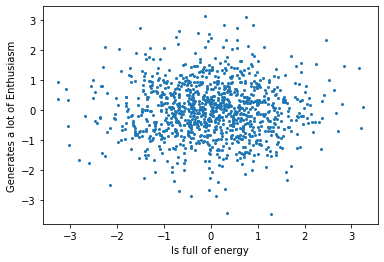

In [95]:
# 2
plt.plot(rotatedData[:,9]*-1, rotatedData[:,14]*-1, 'o',markersize=2)
plt.xlabel('Is full of energy')
plt.ylabel('Generates a lot of Enthusiasm')

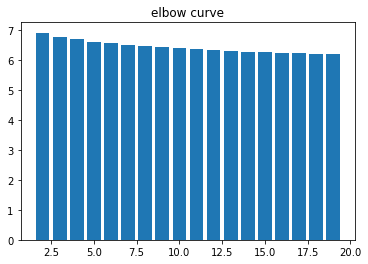

In [96]:
# 3
res = list()
n_cluster = range(2,20)
for n in n_cluster:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(rotatedData)
    res.append(np.average(np.min(cdist(rotatedData, kmeans.cluster_centers_, 'euclidean'), axis=1)))

plt.bar(n_cluster, res)
plt.title('elbow curve')
plt.show()

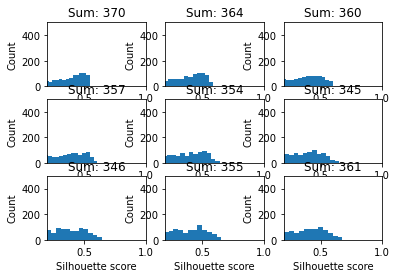

In [98]:
# Init:
numClusters = 11 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1]) # init container to store sums
Q[:] = np.NaN # convert to NaN

# Store our transformed data - the predictors - as X:
X = np.transpose(np.array([rotatedData[:,0],rotatedData[:,1]]))

# Compute kMeans:
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii)).fit(X) # compute kmeans
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(X,cId) # compute the mean silhouette coefficient of all samples
    # print(s.shape)
    Q[ii-2] = sum(s) # take sum
    #print(int(Q[ii-2]))
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(0.2,1)
    plt.ylim(0,500)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    

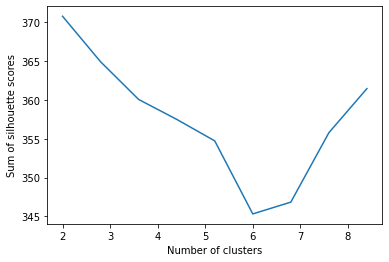

In [99]:
#%% Plot this to make it clearer what is going on

plt.plot(np.linspace(2,10,numClusters),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

# kMeans gives you the center coordinates of the clusters, assuming a number
# of clusters. Silhouette gives you how many are most unamigously described
# by the clusters. Most likely "real" number: Where the sum of the
# silhouette scores peaks. In reality, they are complementary. Use together


370


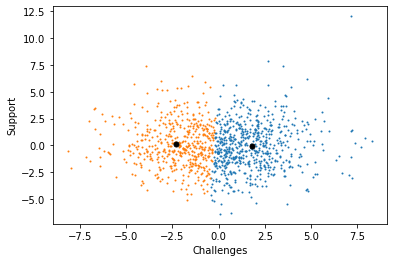

In [100]:
kMeans = KMeans(n_clusters = int(2)).fit(X) # compute kmeans
cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
s = silhouette_samples(X,cId) # compute the mean silhouette coefficient of all samples
    # print(s.shape)
Q[ii-2] = sum(s) # take sum
print(int(Q[ii-2]))



#%% Now let's plot and color code the data
indexVector = np.linspace(1,len(np.unique(cId)),len(np.unique(cId))) 
for ii in indexVector:
    plotIndex = np.argwhere(cId == int(ii-1))
    plt.plot(rotatedData[plotIndex,0],rotatedData[plotIndex,1],'o',markersize=1)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    plt.xlabel('Challenges')
    plt.ylabel('Support')


In [101]:
# 4

ratings = data[:, :400]

aveRatings = []
for i in range(0, len(ratings)):
    if np.isnan(ratings[i]).all():
        aveRatings.append(2)
    else:
        #print(type(ratings[i]))
        aveRatings.append(np.nanmean(ratings[i]))

aveRatings = np.array(aveRatings)
print(aveRatings.shape)

class1 = np.quantile(aveRatings, .33)
class2 = np.quantile(aveRatings, .66)
class3 = np.quantile(aveRatings, 1.0)

# convert to class
for i in range(0, len(aveRatings)):
    if aveRatings[i] < class1:
        aveRatings[i] = 1
    elif aveRatings[i] < class2:
        aveRatings[i] = 2
    else:
        aveRatings[i] = 3

X_train, X_test, y_train, y_test = train_test_split(rotatedData, aveRatings, test_size=0.2) # 70% training and 30% test

classifier = RandomForestClassifier(n_estimators=50, criterion = 'entropy', random_state=1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# output confusion matrix and total accuracy score
print(cm)

accuracy_score(y_test, y_pred)

(1097,)
[[26 28 12]
 [25 28 19]
 [21 31 30]]


0.38181818181818183

(220,)
(220,)


/Users/yjeonlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


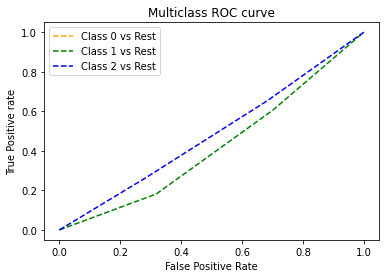

In [102]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
#metrics.plot_roc_curve(classifier, X_test, y_test) 
print(y_test.shape)
print(y_pred.shape)
#roc_auc_score(y_test, y_pred, multi_class='ovo')


# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred, pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [103]:


ratings = data[:, :400]
# ratings = ratings.T
# print(ratings)


mean = np.nanmean(ratings, axis=0)
idx = np.where(np.isnan(ratings))
ratings[idx] = np.take(mean, idx[1])

print(ratings)



aveRatings = []
for i in range(0, len(ratings)):
    if np.isnan(ratings[i]).all():
        aveRatings.append(2)
    else:
        #print(type(ratings[i]))
        aveRatings.append(np.nanmean(ratings[i]))

aveRatings = np.array(aveRatings)
print(aveRatings.shape)

class1 = np.quantile(aveRatings, .33)
class2 = np.quantile(aveRatings, .66)
class3 = np.quantile(aveRatings, 1.0)
#class4 = np.quantile(aveRatings, 1.0)

# convert to class
for i in range(0, len(aveRatings)):
    if aveRatings[i] < class1:
        aveRatings[i] = 1
    elif aveRatings[i] < class2:
        aveRatings[i] = 2
#     elif aveRatings[i] < class3:
#         aveRatings[i] = 3
    else:
        aveRatings[i] = 3

print(aveRatings)
X_train, X_test, y_train, y_test = train_test_split(rotatedData, aveRatings, test_size=0.2) # 70% training and 30% test

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = RandomForestClassifier(n_estimators=50, criterion = 'entropy', random_state=1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# output confusion matrix and total accuracy score
print(cm)

accuracy_score(y_test, y_pred)



# y_pred = classifier.predict(X_test)

# # check accuracy comparig y_test and y_pred
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)

# # output confusion matrix and total accuracy score
# print(cm)
# accuracy_score(y_test, y_pred)

[[2.15131579 2.02112676 4.         ... 2.40229885 2.1147541  2.33796296]
 [2.15131579 2.02112676 1.5        ... 2.40229885 2.1147541  2.33796296]
 [2.15131579 2.02112676 3.15342163 ... 2.40229885 2.1147541  2.33796296]
 ...
 [2.15131579 2.02112676 3.15342163 ... 2.40229885 2.1147541  2.33796296]
 [2.15131579 2.02112676 3.15342163 ... 2.40229885 2.1147541  2.33796296]
 [2.15131579 2.02112676 4.         ... 2.40229885 2.1147541  2.33796296]]
(1097,)
[1. 1. 2. ... 2. 2. 2.]
[[27 13 35]
 [33 25 28]
 [16 13 30]]


0.37272727272727274

In [182]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# # fit the model using the training data
# from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)

# # make prediction on the test data
# y_pred = classifier.predict(X_test)

# # check accuracy comparig y_test and y_pred
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)

# # output confusion matrix and total accuracy score
# print(cm)
# accuracy_score(y_test, y_pred)

In [108]:
# 5
from sklearn.neural_network import MLPClassifier

data = np.genfromtxt('/Users/yjeonlee/Desktop/[DS-GA-1001]Intro to Data Science/Project3/movieReplicationSet.csv',  delimiter = ',',  skip_header = 1)
colMedian = np.nanmedian(data, axis=0)
indices = np.where(np.isnan(data))
data[indices] = np.take(colMedian, indices[1])
#filledData = np.where(np.isnan(selected), ma.array(selected, mask=np.isnan(selected)).median(axis=0), selected)
filledData = data

ratings = data[:, :400]
personal = data[:, 401:]

aveRatings = []
for i in range(0, len(ratings)):
    if np.isnan(ratings[i]).all():
        aveRatings.append(2)
    else:
        #print(type(ratings[i]))
        aveRatings.append(np.nanmean(ratings[i]))

aveRatings = np.array(aveRatings)
print(aveRatings.shape)

class1 = np.quantile(aveRatings, .33)
class2 = np.quantile(aveRatings, .66)
class3 = np.quantile(aveRatings, 1.0)
#class4 = np.quantile(aveRatings, 1.0)

# convert to class
for i in range(0, len(aveRatings)):
    if aveRatings[i] < class1:
        aveRatings[i] = 1
    elif aveRatings[i] < class2:
        aveRatings[i] = 2
#     elif aveRatings[i] < class3:
#         aveRatings[i] = 3
    else:
        aveRatings[i] = 3

X_train, X_test, y_train, y_test = train_test_split(personal, aveRatings, test_size=0.2) # 70% training and 30% test

clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(20,), random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

(1097,)
[[20 27 20]
 [24 25 26]
 [18 29 31]]


/Users/yjeonlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.34545454545454546